In [130]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import statsmodels.api as sm
from dateutil import parser
from statsmodels.tsa.arima.model import ARIMA


## Problem 1

In [131]:
current_date = datetime.date(2023, 3, 3)
expiration_date = datetime.date(2023, 3, 17)

days = (expiration_date - current_date).days
ttm = days/365

print("Time to maturity (calendar days):", ttm)

Time to maturity (calendar days): 0.038356164383561646


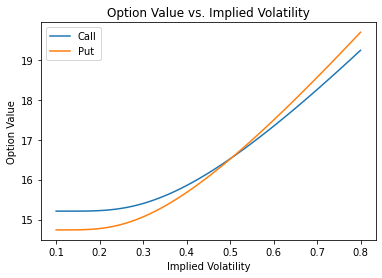

In [132]:
# Define parameters
S = 165
PK = 180
CK = 150
r = 0.0425
T = ttm
q = 0.0053

# Define a range of implied volatilities
sigma_range = np.linspace(0.1, 0.8, 100)

# Define the BSM call and put formulas
def bsm_call_value(S, CK, T, r, q, sigma):
    d1 = (np.log(S/CK) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_value = S * np.exp(-q * T) * norm.cdf(d1) - CK * np.exp(-r * T) * norm.cdf(d2)
    return call_value

def bsm_put_value(S, PK, T, r, q, sigma):
    d1 = (np.log(S/PK) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_value = PK * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return put_value

# Calculate the call and put values for each implied volatility in the range
call_values = [bsm_call_value(S, CK, T, r, q, sigma) for sigma in sigma_range]
put_values = [bsm_put_value(S, PK, T, r, q, sigma) for sigma in sigma_range]

# Plot the call and put values as a function of implied volatility
plt.plot(sigma_range, call_values, label='Call')
plt.plot(sigma_range, put_values, label='Put')
plt.legend()
plt.xlabel('Implied Volatility')
plt.ylabel('Option Value')
plt.title('Option Value vs. Implied Volatility')
plt.show()

## Problem 2

In [133]:
# Load options data
df = pd.read_csv("AAPL_Options.csv")
df.head()

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,4/21/2023,Call,125,27.300
1,AAPL,4/21/2023,Call,130,22.575
2,AAPL,4/21/2023,Call,135,17.750
3,AAPL,4/21/2023,Call,140,13.850
4,AAPL,4/21/2023,Call,145,9.975


In [134]:
# Read the CSV file
df = pd.read_csv('AAPL_Options.csv')

# Current AAPL price, date, and risk-free rate
S = 151.03
today = pd.to_datetime('2023-03-03')
risk_free_rate = 0.0425
continuous_coupon = 0.0053

# Black-Scholes formula for European options
def black_scholes(S, K, T, r, q, sigma, option_type):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'Call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'Put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return price

# Function to find the implied volatility
def implied_volatility(S, K, T, r, q, market_price, option_type):
    def objective_function(sigma):
        return black_scholes(S, K, T, r, q, sigma, option_type) - market_price

    try:
        result = brentq(objective_function, 1e-6, 1, full_output=False, disp=False)
    except ValueError:
        result = np.nan
    return result

# Calculate implied volatility for each option
df['Expiration'] = pd.to_datetime(df['Expiration'])
df['T'] = (df['Expiration'] - today).dt.days / 365
df['Implied_Volatility'] = df.apply(lambda row: implied_volatility(S, row['Strike'], row['T'], risk_free_rate, continuous_coupon, row['Last Price'], row['Type']), axis=1)

print(df)

   Stock Expiration  Type  Strike  Last Price         T  Implied_Volatility
0   AAPL 2023-04-21  Call     125      27.300  0.134247            0.374597
1   AAPL 2023-04-21  Call     130      22.575  0.134247            0.342351
2   AAPL 2023-04-21  Call     135      17.750  0.134247            0.292522
3   AAPL 2023-04-21  Call     140      13.850  0.134247            0.299358
4   AAPL 2023-04-21  Call     145       9.975  0.134247            0.278743
5   AAPL 2023-04-21  Call     150       6.700  0.134247            0.263141
6   AAPL 2023-04-21  Call     155       4.050  0.134247            0.246828
7   AAPL 2023-04-21  Call     160       2.210  0.134247            0.235242
8   AAPL 2023-04-21  Call     165       1.035  0.134247            0.223567
9   AAPL 2023-04-21  Call     170       0.460  0.134247            0.219339
10  AAPL 2023-04-21  Call     175       0.195  0.134247            0.218342
11  AAPL 2023-04-21   Put     125       0.405  0.134247            0.334615
12  AAPL 202

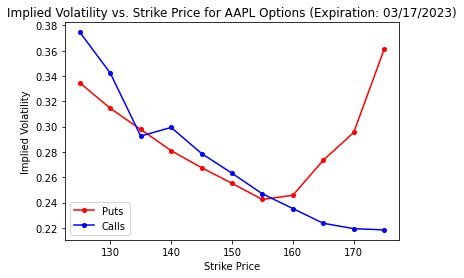

In [135]:
# Separate Puts and Calls data
puts = df[df['Type'] == 'Put']
calls = df[df['Type'] == 'Call']

# Create the plot
plt.plot(puts['Strike'], puts['Implied_Volatility'], 'r-o', label='Puts', markersize=4)
plt.plot(calls['Strike'], calls['Implied_Volatility'], 'b-o', label='Calls', markersize=4)

# Set labels and title
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Strike Price for AAPL Options (Expiration: 03/17/2023)')
plt.legend()

# Show the plot
plt.show()

## Problem 3

In [136]:
import var as r

In [137]:
current_date = pd.to_datetime(current_date)

In [138]:
# risk free rate and dividend
rf = 0.0425
q = 0.0053
S = 151.03
port = pd.read_csv('problem3.csv')
today = pd.to_datetime('2023-03-03')
port['ExpirationDate'] = pd.to_datetime(port['ExpirationDate'])
port['T'] = (port['ExpirationDate'] - today).dt.days / 365

port['Implied_Volatility'] = port.apply(
    lambda row: implied_volatility(S, row['Strike'], rf, q, row['T'], row['CurrentPrice'], row['OptionType'])
    if row['Type'] == 'Option' else np.nan,
    axis=1
)
port.head()

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,T,Implied_Volatility
0,Straddle,Option,AAPL,1,Call,2023-04-21,150.0,6.80,0.134247,0.542910
1,Straddle,Option,AAPL,1,Put,2023-04-21,150.0,4.85,0.134247,0.401306
2,SynLong,Option,AAPL,1,Call,2023-04-21,150.0,6.80,0.134247,0.542910
3,SynLong,Option,AAPL,-1,Put,2023-04-21,150.0,4.85,0.134247,0.401306
4,CallSpread,Option,AAPL,1,Call,2023-04-21,150.0,6.80,0.134247,0.542910


In [139]:
def portfolio_value(portfolio, underlying_range, r, q, today, d_ahead = 0):
    values = []

    for underlying in underlying_range:
        total_value = 0

        for _, row in portfolio.iterrows():
            holding = row['Holding']

            if row['Type'] == 'Stock':
                total_value += holding * underlying
            elif row['Type'] == 'Option':
                T = ((row['ExpirationDate'] - today) / pd.Timedelta(1, 'D') - d_ahead) / 365
                option_value = black_scholes(underlying, row['Strike'], r, q, T, row['Implied_Volatility'], row['OptionType'])
                total_value += holding * option_value
        
        values.append(total_value)

    return values

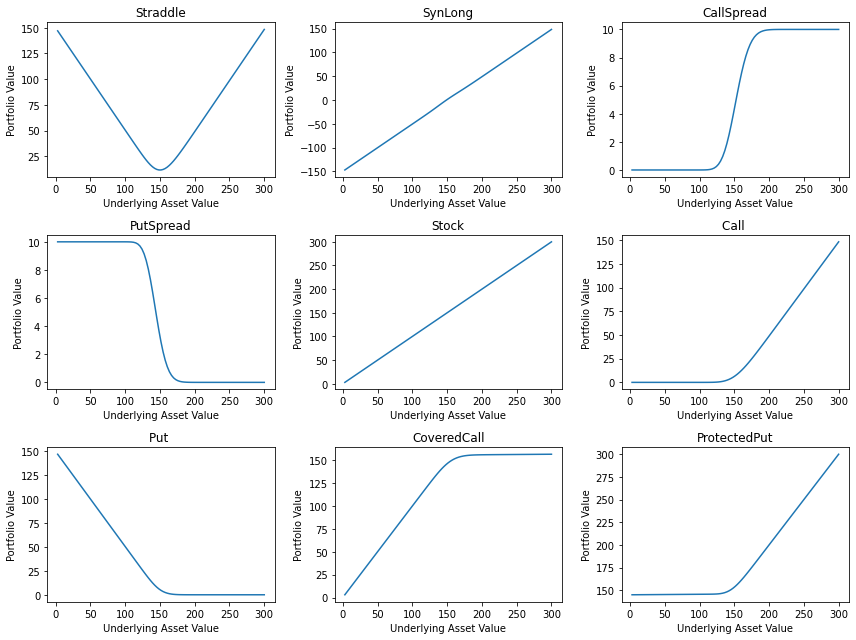

In [140]:
# Get a list of unique portfolio names
portfolios = port['Portfolio'].unique()

# Define the range of underlying asset values
underlying_range = np.linspace(0, 300, num=100)[1:]


# Define the number of rows and columns in the grid
nrows = 3
ncols = 3

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 9))

# Loop through the portfolios and add a plot to the grid
for i, portfolio_name in enumerate(portfolios):
    # Calculate the row and column index of the current subplot
    row = i // ncols
    col = i % ncols

    # Get the current axis
    ax = axes[row, col]

    # Calculate the portfolio values
    portfolio_data = port[port['Portfolio'] == portfolio_name]
    values = portfolio_value(portfolio_data, underlying_range, rf, q, current_date)
    
    # Plot the portfolio values on the current axis
    ax.plot(underlying_range, values, label=portfolio_name)
    ax.set_xlabel('Underlying Asset Value')
    ax.set_ylabel('Portfolio Value')
    ax.set_title(f'{portfolio_name}')

# Adjust the layout of the subplots and show the plot
plt.tight_layout()
plt.show()

In [141]:
# Load the data from the CSV file
data = pd.read_csv('DailyPrices.csv')

# Calculate the log returns of AAPL
aapl_returns = np.log(data['AAPL']) - np.log(data['AAPL'].shift(1))

# Demean the series so there is 0 mean
aapl_returns = aapl_returns - aapl_returns.mean()

# Fit an AR(1) model to AAPL returns
ar_result = ARIMA(aapl_returns, order=(1, 0, 0)).fit()

In [142]:
n_forecast = 10
sim = 1000
phi = ar_result.params[1]
beta = ar_result.params[0]
sigma = ar_result.resid.std()
# Generate the simulated returns
simulated_returns = np.zeros((n_forecast,sim))
for j in range(sim):
    simulated_returns[0,j]= beta + phi * aapl_returns.iloc[-1] + sigma * norm.rvs()
    for i in range(n_forecast-1):
        simulated_returns[i+1,j] = beta + phi * simulated_returns[i,j] + sigma * norm.rvs()

initial_price = 151.03

# Calculate the price series
price_series = pd.DataFrame(initial_price * np.exp(simulated_returns.cumsum(axis=0)))

simulation_price = price_series.loc[9:].values[0]

In [143]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=portfolios, index=['Mean', 'VaR', 'ES'])

# Iterate through each portfolio and calculate the Mean, VaR, and ES
for portname in portfolios:
    portfolio_data = port[port['Portfolio'] == portname]
    simulate_portfolio_values = pd.DataFrame(portfolio_value(portfolio_data, simulation_price, rf, q, current_date, d_ahead=10))
    current_portfolio_values = pd.DataFrame(portfolio_value(portfolio_data, [initial_price], rf, q, current_date))

    # Calculate the difference between simulated and current portfolio values
    current_portfolio_value = current_portfolio_values.values[0][0]
    diff_portfolio_values = simulate_portfolio_values.apply(lambda x: x - current_portfolio_value)

    #print(diff_portfolio_values.values[0])
    # Calculate the Mean, VaR, and ES for the difference
    Mean = diff_portfolio_values.mean().values[0]

    var = r.calculate_var(diff_portfolio_values.values)
    es = r.calculate_es(diff_portfolio_values.values, var)

    # Add the results to the DataFrame
    results_df.at['Mean', portname] = Mean
    results_df.at['VaR', portname] = var
    results_df.at['ES', portname] = es

# Display the results
results_df.T

,Mean,VaR,ES
Straddle,2.560584,0.012308,0.018895
SynLong,-0.034777,15.822381,20.112038
CallSpread,0.069628,3.281083,3.735334
PutSpread,0.382579,2.630799,2.792891
Stock,0.105896,15.250122,19.281089
Call,1.262904,5.282852,5.836762
Put,1.297681,4.30782,4.541328
CoveredCall,-1.198672,11.79587,15.572902
ProtectedPut,1.257832,6.949123,7.588972
